In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [64]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [65]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [66]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
titanic.shape

(891, 12)

In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
E mbarked      889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [69]:
titanic_1 = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [70]:
titanic_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [71]:
titanic_1.shape

(891, 7)

In [72]:
titanic_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Survived    891 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [73]:
titanic_1.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [74]:
titanic_1['Age'].mean()

29.69911764705882

In [75]:
titanic_1['Age'] = titanic_1['Age'].fillna(titanic_1['Age'].mean())

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
titanic_1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [77]:
titanic_1['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [78]:
titanic_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [79]:
titanic_1[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [80]:
titanic_1[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [81]:
titanic_1[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [82]:
titanic_1['Sex'] = titanic_1['Sex'].map({'male': 1, 'female':0}).astype(int)
titanic_1['Age'] = titanic_1['Age'].astype(int)

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
titanic_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22,1,0,7.2500,0
1,1,0,38,1,0,71.2833,1
2,3,0,26,0,0,7.9250,1
3,1,0,35,1,0,53.1000,1
4,3,1,35,0,0,8.0500,0


In [84]:
abc  = titanic_1

In [85]:
titanic_1['agebin'] = pd.cut(titanic_1['Age'].astype(int), 5)
titanic_1['agebin'].value_counts()

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(16.0, 32.0]     525
(32.0, 48.0]     186
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: agebin, dtype: int64

In [86]:
titanic_1.loc[ titanic_1['Age'] <= 16, 'Age']  = 0
titanic_1.loc[(titanic_1['Age'] > 16) & (titanic_1['Age'] <= 32), 'Age'] = 1
titanic_1.loc[(titanic_1['Age'] > 32) & (titanic_1['Age'] <= 48), 'Age'] = 2
titanic_1.loc[(titanic_1['Age'] > 48) & (titanic_1['Age'] <= 64), 'Age'] = 3
titanic_1.loc[ titanic_1['Age'] > 64, 'Age'] = 4

C:\Users\shibi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [87]:
titanic_1['Age'].value_counts()

1    525
2    186
0    100
3     69
4     11
Name: Age, dtype: int64

In [88]:
titanic_1 = titanic_1.drop('agebin', axis = 1)
titanic_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,1,1,0,7.2500,0
1,1,0,2,1,0,71.2833,1
2,3,0,1,0,0,7.9250,1
3,1,0,2,1,0,53.1000,1
4,3,1,2,0,0,8.0500,0


In [89]:
titanic_1.shape

(891, 7)

Text(0.5, 1.05, 'Pearson Correlation of Features')

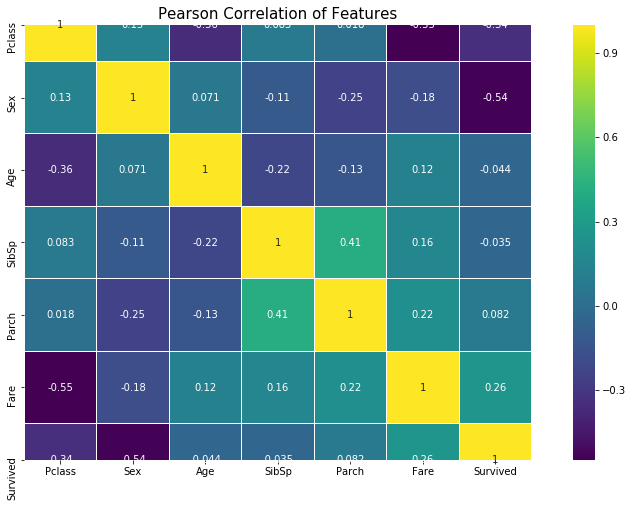

In [108]:
plt.figure(figsize=(15,8))
sns.heatmap(titanic_1.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='viridis', linecolor='white', annot=True)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

C:\Users\shibi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


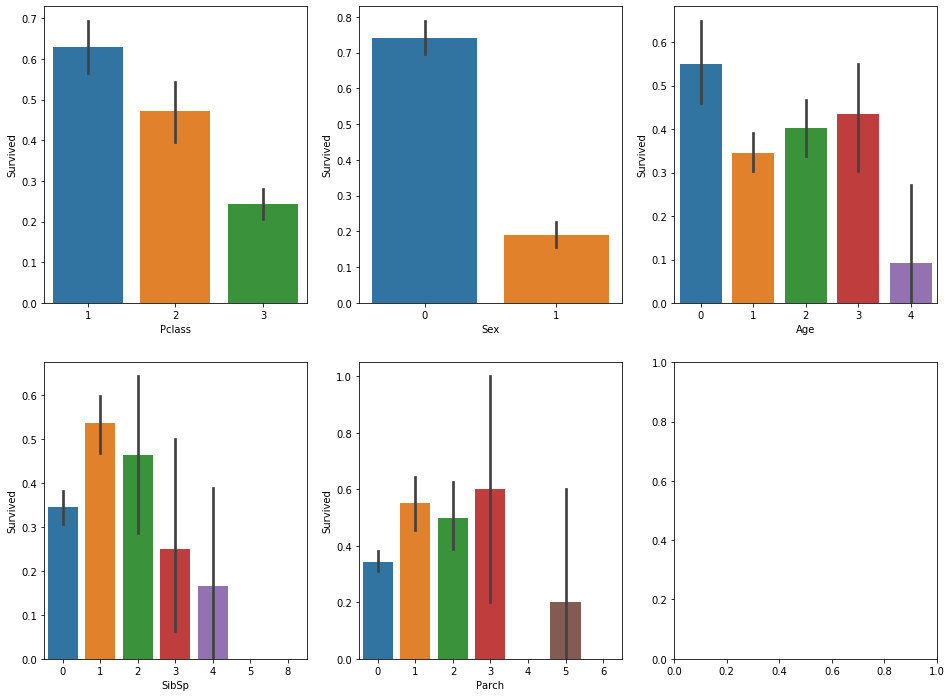

In [114]:
fig, saxis = plt.subplots(2, 3, figsize=(16,12))
sns.barplot(x='Pclass', y='Survived', data=titanic_1, ax = saxis[0,0])
sns.barplot(x='Sex', y='Survived', data=titanic_1, ax = saxis[0,1])
sns.barplot(x='Age', y='Survived', data=titanic_1, ax = saxis[0,2])
sns.barplot(x='SibSp', y='Survived', data=titanic_1, ax = saxis[1,0])
sns.barplot(x='Parch', y='Survived', data=titanic_1, ax = saxis[1,1])

In [112]:
X = titanic_1.drop('Survived', axis = 1)
y = titanic_1['Survived']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [118]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)  
y_pred = decision_tree.predict(X_test)

In [119]:
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [120]:
acc_decision_tree

93.54